# Random Forest Classifier (With Upsampling) for subtask-3

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                                         
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
import pickle


In [60]:
df=pd.read_csv("D:\My_Data_Science Project\Social_Media_Offensive_Detection\Social_Media_Offensive_Languge_Detection\Data_Files\Data_File_v1\olid-training-v1.0.tsv",sep="\t")

In [61]:
df["subtask_c"].value_counts()

IND    2407
GRP    1074
OTH     395
Name: subtask_c, dtype: int64

In [62]:
from sklearn.utils import resample
df["subtask_c"]=df["subtask_c"].astype("category").cat.codes

In [63]:
df["subtask_c"].value_counts()

-1    9364
 1    2407
 0    1074
 2     395
Name: subtask_c, dtype: int64

In [64]:
df.head()

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,-1
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,1
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,-1
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,-1
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,-1


In [65]:
class_0_count = len(df[df['subtask_c'] == 0])
class_1_count = len(df[df['subtask_c'] == 1])
class_2_count = len(df[df['subtask_c'] == 2])

Now perfroming upsampling for target value having 2

In [66]:
other_df = df[df['subtask_c']!=2]

In [67]:
other_df['subtask_c'].value_counts()

-1    9364
 1    2407
 0    1074
Name: subtask_c, dtype: int64

In [68]:
df_with_2 = df[df['subtask_c']==2]

In [69]:
df_with_2['subtask_c'].value_counts()

2    395
Name: subtask_c, dtype: int64

In [70]:
df_2_upsampled = resample(df_with_2, replace=True, n_samples=class_1_count, random_state=123)

In [71]:
df_2_upsampled['subtask_c'].value_counts()

2    2407
Name: subtask_c, dtype: int64

Now concatenate the df_2_upsampled with other_df

In [72]:
df_upsampled = pd.concat([df_2_upsampled, other_df])

In [73]:
df_upsampled['subtask_c'].value_counts()

-1    9364
 2    2407
 1    2407
 0    1074
Name: subtask_c, dtype: int64

Now performing upsampling for the target value 0

In [74]:
other_df_2 = df_upsampled[df_upsampled['subtask_c']!=0]

In [75]:
other_df_2['subtask_c'].value_counts()

-1    9364
 2    2407
 1    2407
Name: subtask_c, dtype: int64

In [76]:
df_with_0 = df_upsampled[df_upsampled['subtask_c']==0]

In [77]:
df_with_0['subtask_c'].value_counts()

0    1074
Name: subtask_c, dtype: int64

In [78]:
df_0_upsampled = resample(df_with_0, n_samples=class_1_count, replace=True, random_state=123)

In [79]:
df_0_upsampled['subtask_c'].value_counts()

0    2407
Name: subtask_c, dtype: int64

Now concatenate df_0_upsampled with other_df_2

In [80]:
df_upsampled_latest = pd.concat([df_0_upsampled, other_df_2])

In [81]:
df_upsampled_latest['subtask_c'].value_counts()

-1    9364
 0    2407
 2    2407
 1    2407
Name: subtask_c, dtype: int64

In [82]:
df_upsampled_latest.head()

,id,tweet,subtask_a,subtask_b,subtask_c
12752,87955,"@USER @USER Right. shoot the messenger."" Don't...",OFF,TIN,0
1165,48474,@USER and @USER @USER @USER is inciting VIOLE...,OFF,TIN,0
1034,61788,"@USER @USER @USER @USER Yes, you are right: no...",OFF,TIN,0
1273,11650,#obama: wall won’t keep terrorists away. Same ...,OFF,TIN,0
7825,53564,@USER Anarchist Nefarious Treason Invading Fre...,OFF,TIN,0


In [83]:
cout_Vect = CountVectorizer()

In [84]:
X = cout_Vect.fit_transform(df_upsampled_latest['tweet'])
Y = df_upsampled_latest['subtask_c']

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rfc_model = RandomForestClassifier(n_estimators=200, max_features='auto', random_state=101,n_jobs=8)

In [88]:
rfc_model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200, n_jobs=8, random_state=101)

In [89]:
y_pred = rfc_model.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [91]:
acc_score = accuracy_score(Y_test, y_pred)
print('Accuracy score:', acc_score)

Accuracy score: 0.8375037684654808


In [92]:
list1 = ['Liberals are so pathetic  INNOCENT UNTIL PROVEN GUILTY mean much  Democrats should look at their own party if they need a rapist to hang  KavanaughIsInnocent WalkAwayFromDemocrats LiberalLies are straight from the Pitts of HELL']
string = cout_Vect.transform(list1)
sample_prediction = rfc_model.predict(string)
sample_prediction

array([-1], dtype=int8)

In [93]:
list1 = ['StopKavanaugh he is liar like the rest of the GOP']
string = cout_Vect.transform(list1)
sample_prediction = rfc_model.predict(string)
sample_prediction

array([1], dtype=int8)

In [94]:
list1 = ['children for gun control  What good did that do  Youre full of crap']
string = cout_Vect.transform(list1)
sample_prediction = rfc_model.predict(string)
sample_prediction

array([-1], dtype=int8)

In [95]:
a=confusion_matrix(Y_test,y_pred)
a

array([[1829,    3,   21,    3],
       [  73,  394,    1,    0],
       [ 434,    2,   70,    0],
       [   2,    0,    0,  485]], dtype=int64)

In [96]:
from sklearn.metrics import ConfusionMatrixDisplay

In [97]:
cmax_disp = ConfusionMatrixDisplay(a)

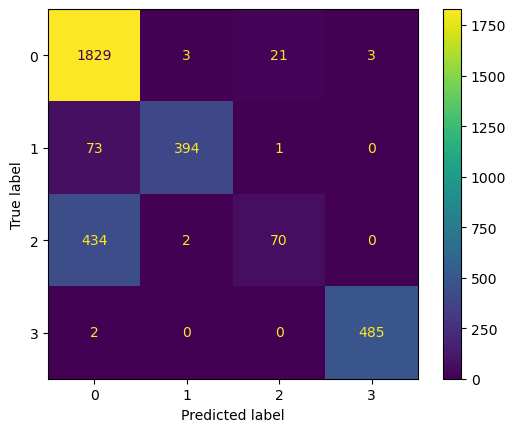

In [98]:
cmax_disp.plot()

In [99]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.78      0.99      0.87      1856
           0       0.99      0.84      0.91       468
           1       0.76      0.14      0.23       506
           2       0.99      1.00      0.99       487

    accuracy                           0.84      3317
   macro avg       0.88      0.74      0.75      3317
weighted avg       0.84      0.84      0.80      3317



Save the model using pickle with vectorizer and model both

In [100]:
filename = 'model_for_c.pkl'

with open(filename, 'wb') as fout:
  pickle.dump((cout_Vect, rfc_model), fout)

Now loading the model and testing out the things

In [101]:
with open('model_for_c.pkl', 'rb') as f:
  vect, model = pickle.load(f)

In [102]:
list1 = ['StopKavanaugh he is liar like the rest of the GOP']
string = vect.transform(list1)
sample_prediction = model.predict(string)
sample_prediction

array([1], dtype=int8)

Save the model

In [103]:
from joblib import dump, load

In [104]:
dump(rfc_model, 'rfc_model_subtask_c.joblib')

['rfc_model_subtask_c.joblib']

In [105]:
list1= ['You are not very smart are you Why do you think Gen Flynns sentencing keeps being rescheduled']
string = cout_Vect.transform(list1)
sample_prediction = model.predict(string)
sample_prediction
if(sample_prediction)==0:
    print("TIN")
else:
    print("UNT")

UNT


In [106]:
list1 = ['Antifa has TS level influence Its scary']
string = cout_Vect.transform(list1)
sample_prediction = model.predict(string)
sample_prediction


array([-1], dtype=int8)

In [120]:
import os
import pandas as pd

file_path = "D:/My_Data_Science Project/Social_Media_Offensive_Detection/Social_Media_Offensive_Languge_Detection/Data_Files/Data_File_v1/testset-levelc.tsv"
test_data = pd.read_csv(os.path.normpath(file_path), sep="\t")

In [125]:
test_label = pd.read_csv("D:\My_Data_Science Project\Social_Media_Offensive_Detection\Social_Media_Offensive_Languge_Detection\Data_Files\Data_File_v1\labels-levelc.csv",sep=",",header=None)
test_label.columns = ['Tweet_ID', 'subtask_c']

In [126]:
test_label

,Tweet_ID,subtask_c
0,15923,OTH
1,60133,GRP
2,83681,IND
3,65507,OTH
4,34263,IND
...,...,...
208,30778,IND
209,22569,GRP
210,48938,IND
211,41438,GRP


In [127]:
test_data.head()

,id,tweet
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...
1,60133,#NoPasaran: Unity demo to oppose the far-right...
2,83681,. . . What the fuck did he do this time?
3,65507,@USER Do you get the feeling he is kissing @US...
4,34263,#StopKavanaugh he is liar like the rest of the...


In [128]:
test_label["subtask_c"] = test_label["subtask_c"].astype("category").cat.codes

In [130]:
test_label['subtask_c'].value_counts()

1    100
0     78
2     35
Name: subtask_c, dtype: int64

In [132]:
test_label.head(20)['subtask_c']

0     2
1     0
2     1
3     2
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    1
12    0
13    2
14    0
15    1
16    0
17    0
18    2
19    2
Name: subtask_c, dtype: int8

In [133]:
for i in range(10):
  list1 = [test_data.loc[i]['tweet']]
  string = cout_Vect.transform(list1)
  sample_prediction = rfc_model.predict(string)
  sample_prediction
  
  print('Sample Prediction:', sample_prediction)

Sample Prediction: [-1]
Sample Prediction: [-1]
Sample Prediction: [-1]
Sample Prediction: [-1]
Sample Prediction: [1]
Sample Prediction: [-1]
Sample Prediction: [-1]
Sample Prediction: [-1]
Sample Prediction: [-1]
Sample Prediction: [1]


In [134]:
import tweepy
import json

auth = tweepy.OAuth1UserHandler (consumer_key, consumer_secret, access_token, access_token_secret)

api = tweepy.API(auth)

In [136]:
search_results = api.search_tweets('PMO')
live_tweet_list = []
for tweet in search_results:
    json_str = tweet._json
    if json_str['lang'] == 'en':
      print('Tweet text: ',json_str['text'])
      live_tweet_list.append(json_str['text'])


Tweet text:  RT @bc_perspective: **BREAKING**

Millions of Freedom Convoy supporters across Canada denounce PSAC’s violence &amp; disruptive actions. We cal…
Tweet text:  RT @ShadowSakshi: अलीबाबा चालीस चोर 
साहब क्या केजरीवाल से  कम है ? 
Coming soon: Rs 467 crore residence complex for PM with underground tu…
Tweet text:  RT @bc_perspective: **BREAKING**

Millions of Freedom Convoy supporters across Canada denounce PSAC’s violence &amp; disruptive actions. We cal…
Tweet text:  RT @bc_perspective: **BREAKING**

Millions of Freedom Convoy supporters across Canada denounce PSAC’s violence &amp; disruptive actions. We cal…
Tweet text:  RT @d96784530: @ashokdilliwala @DG_NTA @PMO_NaMo Only 14 days remaining at least they should tell postpone or not but they ignoring our pro…
Tweet text:  @narendramodi @republic Pm sir, u say u raking life of middle class n aam admi easier! I'm an IT tax payer, doesn't… https://t.co/oV2EYkJGCJ
Tweet text:  RT @bc_perspective: **BREAKING**

Millions of Freed

In [138]:
string = cout_Vect.transform(live_tweet_list)
sample_prediction = rfc_model.predict(string)
sample_prediction

array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1], dtype=int8)